# Setup

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba_array
import matplotlib.gridspec as gridspec

import itertools

import json

# Colorbar Snippet

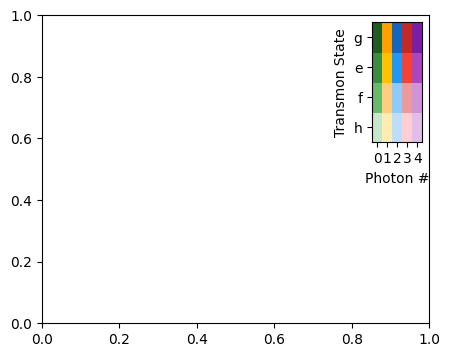

In [2]:
import numpy as np
import matplotlib.pyplot as plt




fig, ax = plt.subplots(1, 1, figsize=[5, 4], dpi = 100)

# Everything from here
##################################################################################################################################

from matplotlib.colors import to_rgba_array
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
greens = ["#1B5E20", "#388E3C", "#66BB6A", "#C8E6C9"] # Green
oranges = ["#FFA000", "#FFC107", "#FFCC80", "#FFECB3"] # Orange 
#oranges = ["#F9A825", "#FDD835", "#FFEE58", "#FFF9C4"] # Orange 
#colors2 = ["#FF6F00", "#FFA000", "#FFEB3B", "#FFE082"] # Orange
blues = ["#1565C0", "#2196F3", "#90CAF9", "#BBDEFB"] # Blue
#reds = ["#880E4F", "#D81B60", "#F06292", "#F8BBD0"] # Red
reds = ["#C62828", "#F44336", "#EF9A9A", "#FFCDD2"] # Red
purples = ["#7B1FA2", "#AB47BC", "#CE93D8", "#E1BEE7"] # Purple
#purples = ["#AD1457", "#D81B60", "#F06292", "#F8BBD0"] # Purple


colors = np.array([greens, oranges, blues, reds, purples], dtype = str)


# This axis here is the main plot axis. replace this with what ever axis you want to add this too 
axins = inset_axes(ax, width=0.5, height=1.2, loc="upper right")  
colors_shape = colors.shape
axins.pcolor(to_rgba_array(colors.transpose(1,0)[::-1,:].flatten()).reshape(colors_shape[1], colors_shape[0], 4))


# uncomment these to move the x labels and ticks to the top
#axins.xaxis.tick_top()
#axins.xaxis.set_label_position('top')

# uncomment these to move the y labels and ticks to the right
#axins.yaxis.tick_right()
#axins.yaxis.set_label_position('right')

axins.set_xticks([0.5, 1.5, 2.5, 3.5, 4.5], ["0", "1", "2", "3", "4"])
axins.set_yticks([0.5, 1.5, 2.5, 3.5], ["h", "f", "e", "g"])
axins.set_xlabel("Photon #")
axins.set_ylabel("Transmon State")

##################################################################################################################################
# To here is needed for the inset legend 



plt.show()

# Sideband Fidelity Plots

In [213]:
f0g1_fidelities = json.load(open('Data/f0g1_fidelities.json'))

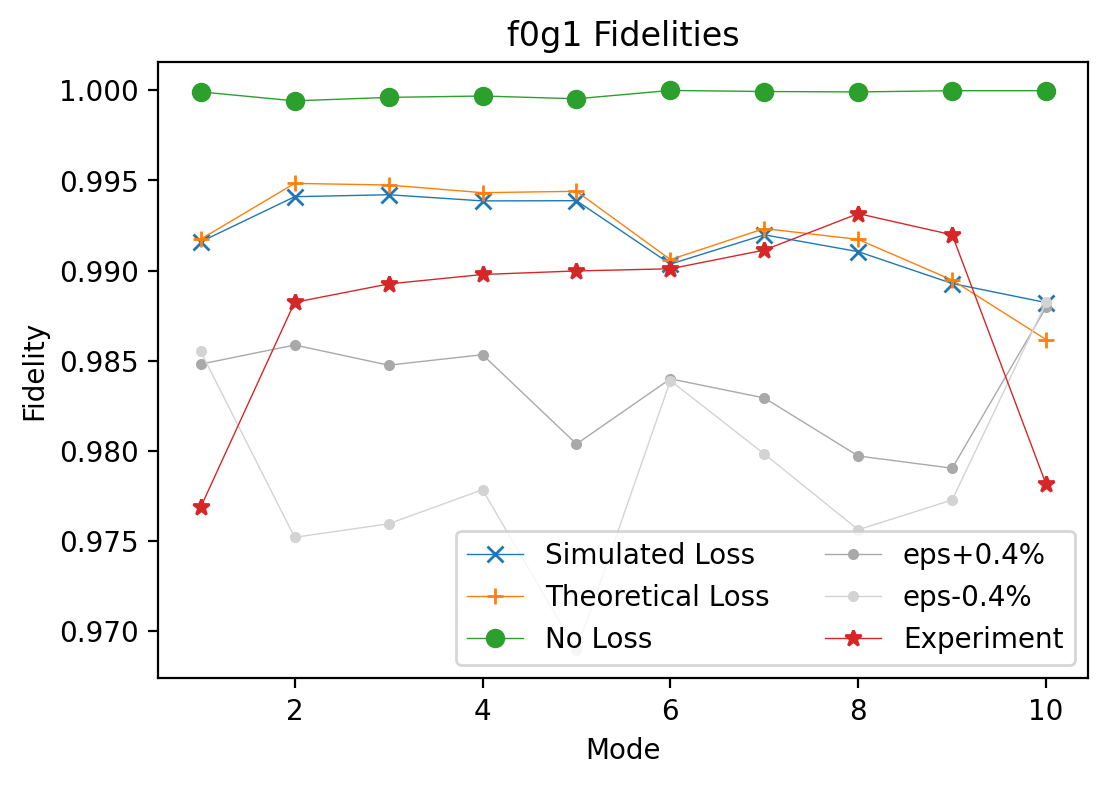

In [214]:
# Extract data from the dictionary
simulated_loss = f0g1_fidelities['Simulated_Loss']
theoretical_loss = f0g1_fidelities['Theoretical_Loss']
no_loss = f0g1_fidelities['No_Loss']
experiment = f0g1_fidelities['Experimental']
simulated_loss_upper = f0g1_fidelities['Simulated_Loss, +0.4%']
simulated_loss_lower = f0g1_fidelities['Simulated_Loss, -0.4%']

# Create a range for the x-axis
x = np.arange(len(simulated_loss))+1

# Plot the data
plt.figure(figsize=(6, 4), dpi=200)
plt.plot(x, simulated_loss, label='Simulated Loss', marker = "x", lw=0.5)
plt.plot(x, theoretical_loss, label='Theoretical Loss', marker = "+", lw = 0.5)
plt.plot(x, no_loss, label='No Loss', marker = "o", lw = 0.5)
plt.plot(x, simulated_loss_upper, label='eps+0.4%', marker = ".", lw=0.5, color = "darkgrey")
plt.plot(x, simulated_loss_lower, label='eps-0.4%', marker = ".", lw=0.5, color = "lightgrey")
plt.plot(x, experiment, label='Experiment', marker = "*", lw = 0.5)


# Add labels and title
plt.xlabel('Mode')
plt.ylabel('Fidelity')
plt.title('f0g1 Fidelities')
plt.legend(ncol = 2)

# Show the plot
plt.show()

# $|g,N\rangle$ and $|g,0\rangle+|g,N\rangle$ State Prep

In [215]:
mode3_N_and_0pN_fidelities = json.load(open('Data/mode3_N_and_0pN_dat.json'))

In [216]:
mode3_N_and_0pN_fidelities["4"]

{'Calibrated': 0.9547358649222646,
 '-0.4% PT': 0.9306411231567087,
 '-0.4%': 0.906240295778516,
 'Calibrated PT': 0.9707489883267618,
 '+0.4%': 0.9486950676691095,
 '+0.4% PT': 0.9618300172117694}

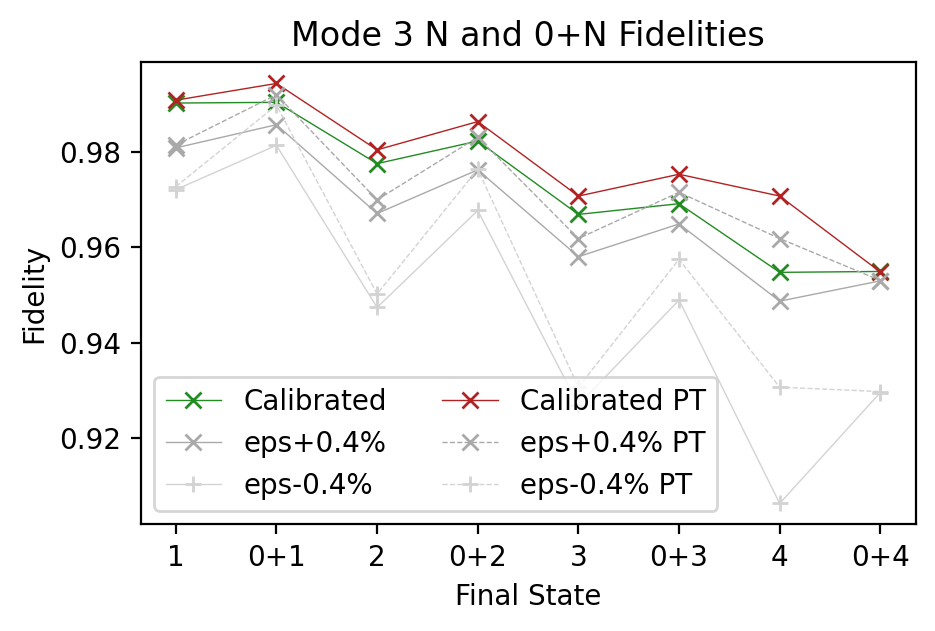

In [217]:
key_order = ["1", "0+1", "2", "0+2", "3", "0+3", "4", "0+4"]
calibrated = [mode3_N_and_0pN_fidelities[key]['Calibrated'] for key in key_order]
upper = [mode3_N_and_0pN_fidelities[key]['+0.4%'] for key in key_order]
lower = [mode3_N_and_0pN_fidelities[key]['-0.4%'] for key in key_order]

plt.figure(figsize=(5, 3), dpi=200)
x = np.arange(len(calibrated))+1
plt.plot(x, calibrated, label='Calibrated', marker = "x", lw=0.5, color = "forestgreen")
plt.plot(x, upper, label='eps+0.4%', marker = "x", lw=0.5, color = "darkgrey")
plt.plot(x, lower, label='eps-0.4%', marker = "+", lw=0.5, color = "lightgrey")


calibrated_pt = [mode3_N_and_0pN_fidelities[key]['Calibrated PT'] for key in key_order]
upper_pt = [mode3_N_and_0pN_fidelities[key]['+0.4% PT'] for key in key_order]
lower_pt = [mode3_N_and_0pN_fidelities[key]['-0.4% PT'] for key in key_order]

plt.plot(x, calibrated_pt, label='Calibrated PT', marker = "x", lw=0.5, color = "firebrick")
plt.plot(x, upper_pt, label='eps+0.4% PT', marker = "x", lw=0.5, color = "darkgrey", linestyle = "--")
plt.plot(x, lower_pt, label='eps-0.4% PT', marker = "+", lw=0.5, color = "lightgrey", linestyle = "--")


plt.xlabel('Final State')
plt.ylabel('Fidelity')
plt.title('Mode 3 N and 0+N Fidelities')
plt.xticks(x, key_order)
plt.legend(ncol = 2)

plt.show()

In [218]:
mode3_N_and_0pN_fidelities.keys()

dict_keys(['0+4', '4', '1', '0+1', '0+2', '2', '0+3', '3'])

# Binomial Code Error Budget Plot

In [219]:
binomial_code_dat = json.load(open('Data/BinomialCodeErrorBudgetFidelties.json'))

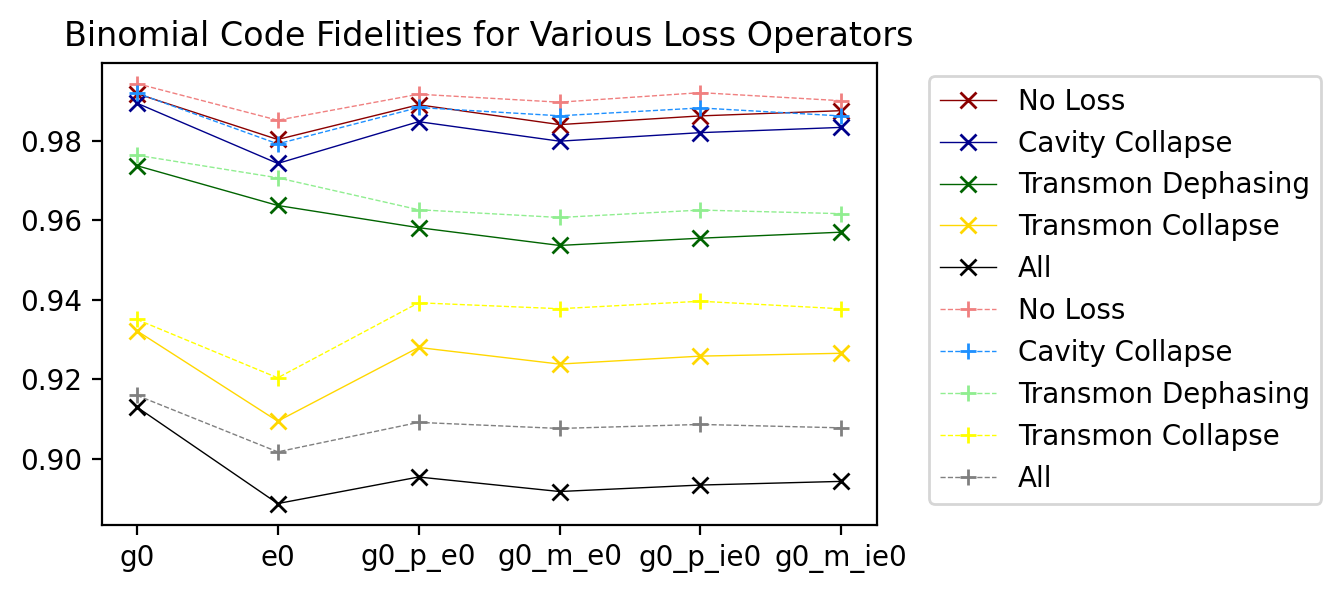

In [220]:
plt.figure(figsize=(5, 3), dpi=200)

x = np.arange(len(binomial_code_dat["init_states"]))+1

plt.plot(x, binomial_code_dat["fid"][""], lw = 0.5, marker = "x", label = "No Loss", color = "darkred")
plt.plot(x, binomial_code_dat["fid"]["Mode3 Collapse"], lw = 0.5, marker = "x", label = "Cavity Collapse", color = "darkblue")
plt.plot(x, binomial_code_dat["fid"]["Transmon Dephasing"], lw = 0.5, marker = "x", label = "Transmon Dephasing", color = "darkgreen")
plt.plot(x, binomial_code_dat["fid"]["Transmon Collapse"], lw = 0.5, marker = "x", label = "Transmon Collapse", color = "gold")
plt.plot(x, binomial_code_dat["fid"]["All"], lw = 0.5, marker = "x", label = "All", color = "black")

plt.plot(x, binomial_code_dat["fid_PT"][""], lw = 0.5, marker = "+", label = "No Loss", linestyle = "--", color = "lightcoral")
plt.plot(x, binomial_code_dat["fid_PT"]["Mode3 Collapse"], lw = 0.5, marker = "+", label = "Cavity Collapse", linestyle = "--", color = "dodgerblue")
plt.plot(x, binomial_code_dat["fid_PT"]["Transmon Dephasing"], lw = 0.5, marker = "+", label = "Transmon Dephasing", linestyle = "--", color = "lightgreen")
plt.plot(x, binomial_code_dat["fid_PT"]["Transmon Collapse"], lw = 0.5, marker = "+", label = "Transmon Collapse", linestyle = "--", color = "yellow")
plt.plot(x, binomial_code_dat["fid_PT"]["All"], lw = 0.5, marker = "+", label = "All", linestyle = "--", color = "grey")


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(x, binomial_code_dat["init_states"])
plt.title("Binomial Code Fidelities for Various Loss Operators") 
plt.show()

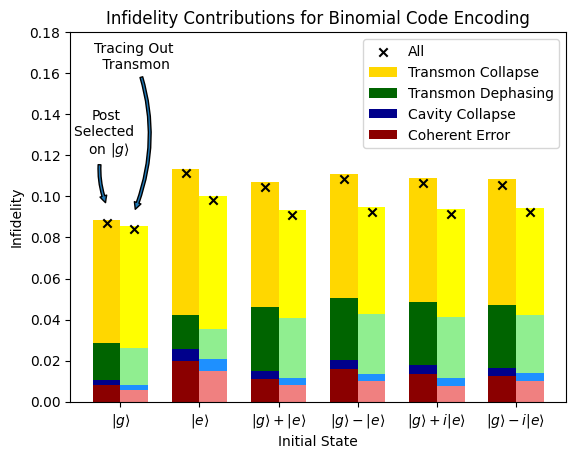

In [221]:
states = [r"$|g\rangle$", r"$|e\rangle$", r"$|g\rangle+|e\rangle$", r"$|g\rangle-|e\rangle$", r"$|g\rangle+i|e\rangle$", r"$|g\rangle-i|e\rangle$"]


# No Traceout Transmon
encoding_error = (1-np.array(binomial_code_dat["fid"][""]))
weight_counts = {
    "Coherent Error": 1-np.array(binomial_code_dat["fid"][""]),
    "Cavity Collapse": 1-np.array(binomial_code_dat["fid"]["Mode3 Collapse"])-encoding_error,
    "Transmon Dephasing": 1-np.array(binomial_code_dat["fid"]["Transmon Dephasing"])-encoding_error,
    "Transmon Collapse": 1-np.array(binomial_code_dat["fid"]["Transmon Collapse"])-encoding_error
}

width = 0.35

fig, ax = plt.subplots()
bottom = np.zeros(len(states))
color = dict(zip(weight_counts.keys(), ["darkred", "darkblue", "darkgreen", "gold"]))
x = np.arange(len(states))
for boolean, weight_count in weight_counts.items():
    p = ax.bar(x-width/2, weight_count, width, label=boolean, bottom=bottom, color = color[boolean])
    bottom += weight_count
ax.scatter(x-width/2, 1-np.array(binomial_code_dat["fid"]["All"]), color = "black", marker = "x")


# Tracing Out Transmon

encoding_error = (1-np.array(binomial_code_dat["fid_PT"][""]))
weight_counts = {
    "Coherent Error": 1-np.array(binomial_code_dat["fid_PT"][""]),
    "Cavity Collapse": 1-np.array(binomial_code_dat["fid_PT"]["Mode3 Collapse"])-encoding_error,
    "Transmon Dephasing": 1-np.array(binomial_code_dat["fid_PT"]["Transmon Dephasing"])-encoding_error,
    "Transmon Collapse": 1-np.array(binomial_code_dat["fid_PT"]["Transmon Collapse"])-encoding_error
}
color = dict(zip(weight_counts.keys(), ["lightcoral", "dodgerblue", "lightgreen", "yellow"]))
x = np.arange(len(states))
bottom = 0
for boolean, weight_count in weight_counts.items():
    p = ax.bar(x+width/2, weight_count, width, bottom=bottom, color = color[boolean])
    bottom += weight_count
ax.scatter(x+width/2, 1-np.array(binomial_code_dat["fid_PT"]["All"]), color = "black", marker = "x", label = "All")


ax.set_xticks(x, states)
ax.set_title("Infidelity Contributions for Binomial Code Encoding")
#ax.legend(bbox_to_anchor=(1, 1))
#ax.legend(loc = "upper center", ncol = 2)


xy = (x[0]-width/2, (1-binomial_code_dat["fid"]["All"][0])*1.1)
xy_text = (x[0]-width/2, (1-binomial_code_dat["fid"]["All"][0])*1.5)
ax.annotate('Post\nSelected \n 'r'on $|g\rangle$', xy=xy, xytext=xy_text, va = "center", ha = "center", arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.2"))

xy = (x[0]+width/2, (1-binomial_code_dat["fid_PT"]["All"][0])*1.1)
xy_text = (x[0]+width/2, (1-binomial_code_dat["fid_PT"]["All"][0])*2)
ax.annotate('Tracing Out\n Transmon', xy=xy, xytext=xy_text, va = "center", ha = "center", arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2"))


handles, labels = plt.gca().get_legend_handles_labels()
order = [0,4,3,2,1]#[1,2,3,4,0]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], ncol = 1)

ax.set_ylabel("Infidelity")
ax.set_ylim(0, 0.18)
ax.set_xlabel("Initial State")
plt.show()


# Binomial Code State Evolution

In [3]:
binomial_code_dat = json.load(open('Data/BinomialCodeErrorBudgetFidelties.json'))

In [4]:
binomial_code_evolution = json.load(open('Data/BinomialCodePrep.json', "r"))

In [5]:
keys_to_use = np.array(["('g0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')","('e0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')","('g0_p_e0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')","('g0_m_e0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')","('g0_p_ie0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')","('g0_m_ie0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')"])
keys_to_use_keys = {"g0": keys_to_use[0], "e0": keys_to_use[1], "g0_p_e0": keys_to_use[2], "g0_m_e0": keys_to_use[3], "g0_p_ie0": keys_to_use[4], "g0_m_ie0": keys_to_use[5]}

plot_labels = np.array([r"$|g\rangle$", r"$|e\rangle$", r"$|g\rangle+|e\rangle$", r"$|g\rangle-|e\rangle$", r"$|g\rangle+i|e\rangle$", r"$|g\rangle-i|e\rangle$"])

keys_to_use = keys_to_use[np.array([0,2,4,1,3,5])]
plot_labels = plot_labels[np.array([0,2,4,1,3,5])]

plot_labels_dict = {"g0": r"$|g\rangle$", "e0": r"$|e\rangle$", "g0_p_e0": r"$|g\rangle+|e\rangle$", "g0_m_e0": r"$|g\rangle-|e\rangle$", "g0_p_ie0": r"$|g\rangle+i|e\rangle$", "g0_m_ie0": r"$|g\rangle-i|e\rangle$"}

#binomial_code_evolution[keys_to_use[0]][str((0,0))]

In [6]:
keys_to_use_keys 

{'g0': np.str_("('g0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')"),
 'e0': np.str_("('e0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')"),
 'g0_p_e0': np.str_("('g0_p_e0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')"),
 'g0_m_e0': np.str_("('g0_m_e0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')"),
 'g0_p_ie0': np.str_("('g0_p_ie0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')"),
 'g0_m_ie0': np.str_("('g0_m_ie0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')")}

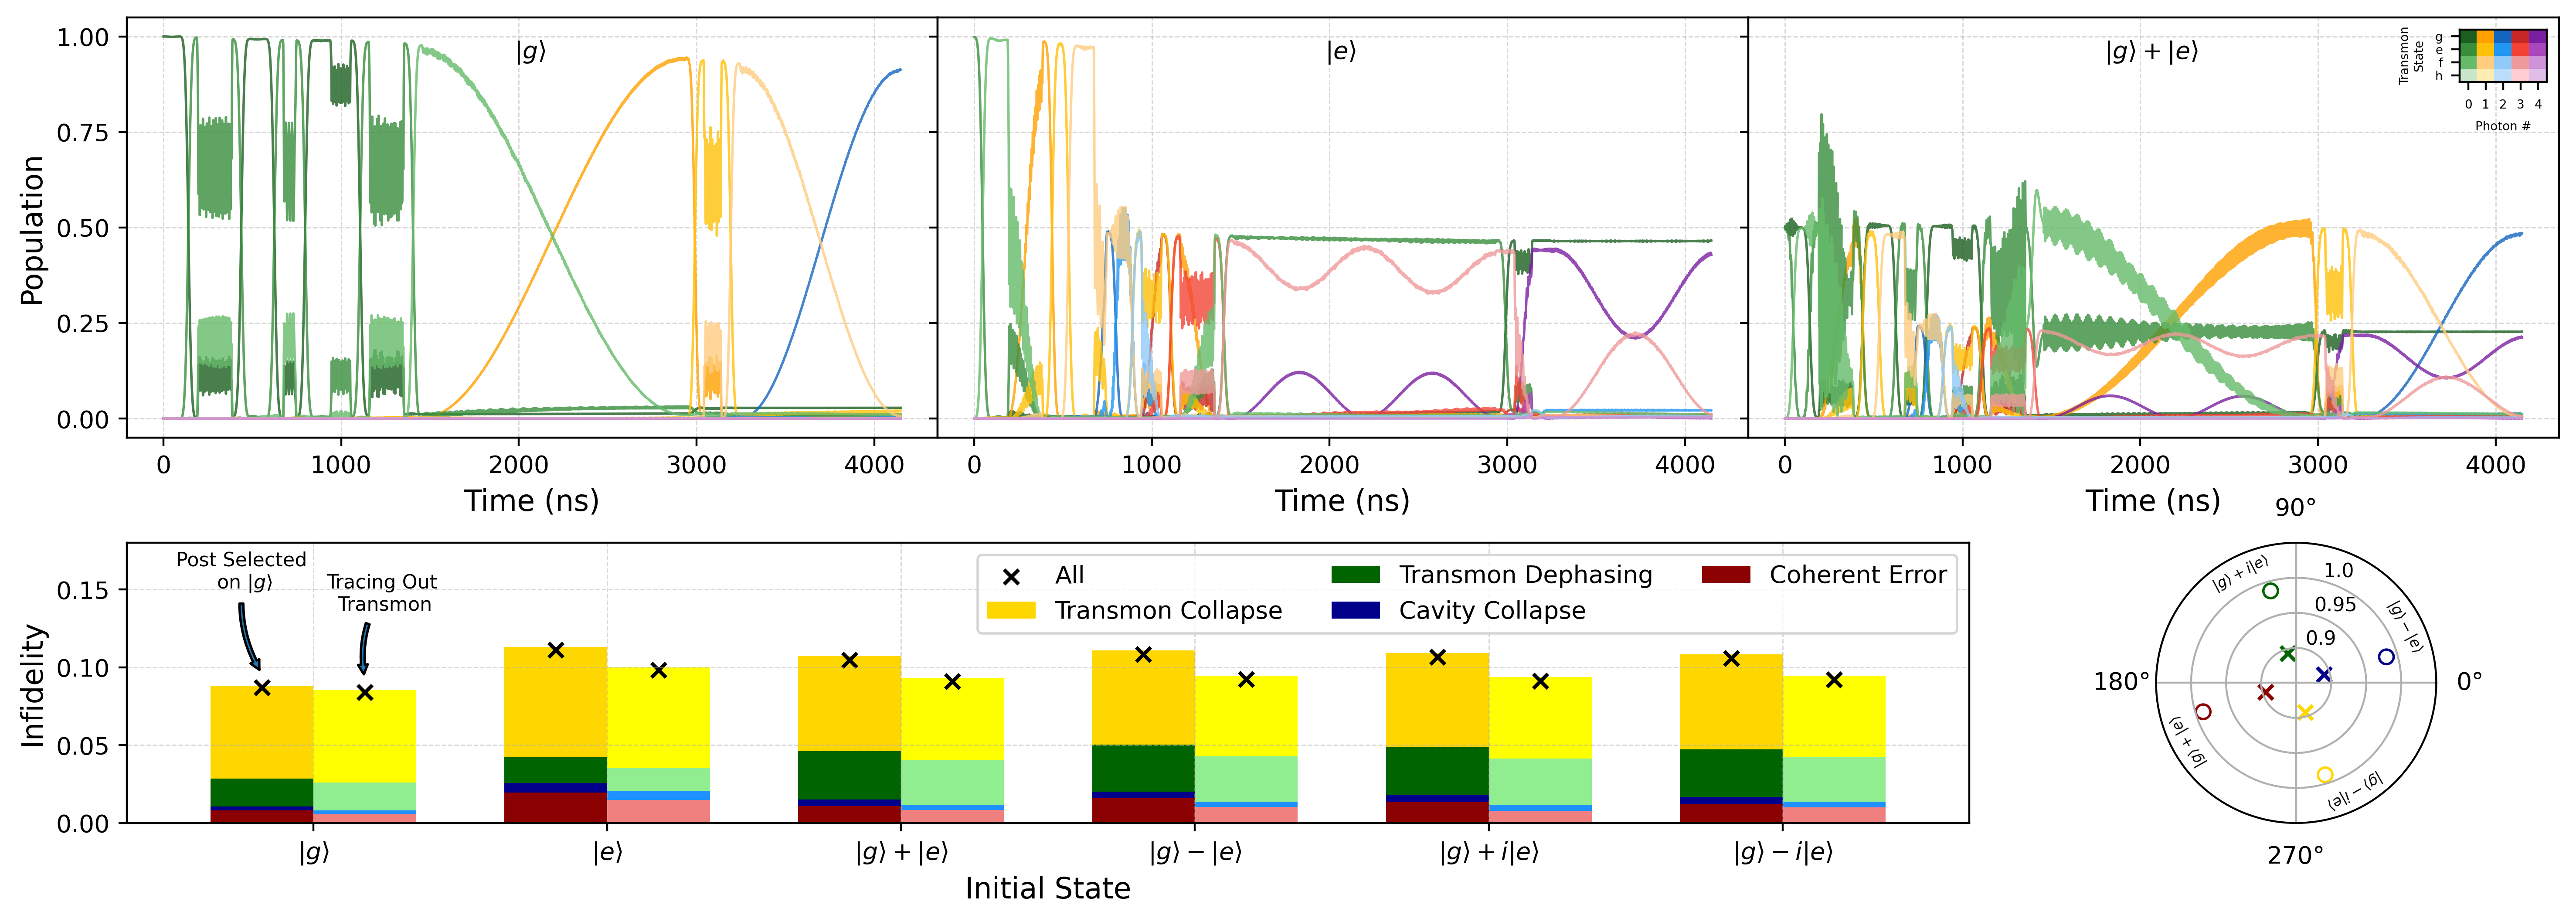

In [13]:
keys_to_use = np.array(["('g0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')","('e0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')","('g0_p_e0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')","('g0_m_e0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')","('g0_p_ie0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')","('g0_m_ie0', 'Mode3 Collapse_Transmon Collapse_Transmon Dephasing')"])
keys_to_use_keys = {"g0": keys_to_use[0], "e0": keys_to_use[1], "g0_p_e0": keys_to_use[2], "g0_m_e0": keys_to_use[3], "g0_p_ie0": keys_to_use[4], "g0_m_ie0": keys_to_use[5]}

plot_labels = np.array([r"$|g\rangle$", r"$|e\rangle$", r"$|g\rangle+|e\rangle$", r"$|g\rangle-|e\rangle$", r"$|g\rangle+i|e\rangle$", r"$|g\rangle-i|e\rangle$"])

plot_labels_dict = {"g0": r"$|g\rangle$", "e0": r"$|e\rangle$", "g0_p_e0": r"$|g\rangle+|e\rangle$", "g0_m_e0": r"$|g\rangle-|e\rangle$", "g0_p_ie0": r"$|g\rangle+i|e\rangle$", "g0_m_ie0": r"$|g\rangle-i|e\rangle$"}

states = list(plot_labels_dict.values())

ax_label_fontsize = 12

# gridspec inside gridspec
fig = plt.figure(figsize=(18, 6), dpi=400)

gs0 = gridspec.GridSpec(2, 1, figure=fig, hspace=0.3, height_ratios=[1.5, 1])

gs00 = gridspec.GridSpecFromSubplotSpec(1,3, subplot_spec=gs0[0], hspace=0.0, wspace=0.0)


axs = np.zeros((2,3), dtype = object)
for i in range(6):
    m = i//3
    if m == 0:
        n = i%3
        axs[m,n] = fig.add_subplot(gs00[m,n])


x = binomial_code_evolution["Times"]
t_levels = [0,1,2]
c_levels = [0,1,2,3,4]



for i, key in enumerate(keys_to_use):
    m = i//3
    if m == 0:
        n = i%3
        axs[m,n].grid(True, which='both', linestyle='--', linewidth=0.5, alpha = 0.5)
        axs[m,n].set_ylim([-0.05,1.05])
        axs[m,n].set_yticks([0, 0.25, 0.5, 0.75, 1])
        axs[m,n].annotate(plot_labels[i], xy=(x[len(x)//2], 0.925), ha='center', va='bottom')
        for state in itertools.product(t_levels, c_levels):
            t = state[1]
            c = state[0]
            y = [binomial_code_evolution[key][str(state)][j]["re"] for j in range(len(binomial_code_evolution[key][str(state)]))]
            axs[m,n].plot(x,y, color = colors[t][c], alpha = 0.8, linewidth = 1)
        
        #if m != 1:
        #    axs[m,n].set_xticklabels([])
        if n != 0:
            axs[m,n].set_yticklabels([])
        
        if n==0:
            axs[m,n].set_ylabel("Population", fontsize = ax_label_fontsize)
        
        if m == 0:
            axs[m,n].set_xlabel("Time (ns)", fontsize = ax_label_fontsize)


axins = inset_axes(axs[0,2], width=0.5, height=0.3, loc="upper right")  
colors_shape = colors.shape
axins.pcolor(to_rgba_array(colors.transpose(1,0)[::-1,:].flatten()).reshape(colors_shape[1], colors_shape[0], 4))

fontsize = 5
axins.set_xticks([0.5, 1.5, 2.5, 3.5, 4.5], ["0", "1", "2", "3", "4"], fontsize = fontsize)
axins.set_yticks([0.5, 1.5, 2.5, 3.5], ["h", "f", "e", "g"], fontsize = fontsize)
axins.set_xlabel("Photon #", fontsize = fontsize)
axins.set_ylabel("Transmon\nState",  fontsize = fontsize)






# the following syntax does the same as the GridSpecFromSubplotSpec call above:
gs01 = gs0[1].subgridspec(1,2, width_ratios=[5,1])

axb = fig.add_subplot(gs01[0])

# No Traceout Transmon
encoding_error = (1-np.array(binomial_code_dat["fid"][""]))
weight_counts = {
    "Coherent Error": 1-np.array(binomial_code_dat["fid"][""]),
    "Cavity Collapse": 1-np.array(binomial_code_dat["fid"]["Mode3 Collapse"])-encoding_error,
    "Transmon Dephasing": 1-np.array(binomial_code_dat["fid"]["Transmon Dephasing"])-encoding_error,
    "Transmon Collapse": 1-np.array(binomial_code_dat["fid"]["Transmon Collapse"])-encoding_error
}

width = 0.35

bottom = np.zeros(len(states))
color = dict(zip(weight_counts.keys(), ["darkred", "darkblue", "darkgreen", "gold"]))
x = np.arange(len(states))
for boolean, weight_count in weight_counts.items():
    p = axb.bar(x-width/2, weight_count, width, label=boolean, bottom=bottom, color = color[boolean])
    bottom += weight_count
axb.scatter(x-width/2, 1-np.array(binomial_code_dat["fid"]["All"]), color = "black", marker = "x")


# Tracing Out Transmon

encoding_error = (1-np.array(binomial_code_dat["fid_PT"][""]))
weight_counts = {
    "Coherent Error": 1-np.array(binomial_code_dat["fid_PT"][""]),
    "Cavity Collapse": 1-np.array(binomial_code_dat["fid_PT"]["Mode3 Collapse"])-encoding_error,
    "Transmon Dephasing": 1-np.array(binomial_code_dat["fid_PT"]["Transmon Dephasing"])-encoding_error,
    "Transmon Collapse": 1-np.array(binomial_code_dat["fid_PT"]["Transmon Collapse"])-encoding_error
}
color = dict(zip(weight_counts.keys(), ["lightcoral", "dodgerblue", "lightgreen", "yellow"]))
x = np.arange(len(states))
bottom = 0
for boolean, weight_count in weight_counts.items():
    p = axb.bar(x+width/2, weight_count, width, bottom=bottom, color = color[boolean])
    bottom += weight_count
axb.scatter(x+width/2, 1-np.array(binomial_code_dat["fid_PT"]["All"]), color = "black", marker = "x", label = "All")


axb.set_xticks(x, states)
#ax.legend(bbox_to_anchor=(1, 1))
#ax.legend(loc = "upper center", ncol = 2)


xy = (x[0]-width/2, (1-binomial_code_dat["fid"]["All"][0])*1.1)
xy_text = (x[0]-width/1.5, (1-binomial_code_dat["fid"]["All"][0])*1.85)
axb.annotate('Post Selected \n'r'on $|g\rangle$', xy=xy, xytext=xy_text, va = "center", ha = "center", arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.2"), fontsize = 8)

xy = (x[0]+width/2, (1-binomial_code_dat["fid_PT"]["All"][0])*1.1)
xy_text = (x[0]+width/1.5, (1-binomial_code_dat["fid_PT"]["All"][0])*1.75)
axb.annotate('Tracing Out\n Transmon', xy=xy, xytext=xy_text, va = "center", ha = "center", arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.2"), fontsize = 8)


handles, labels = plt.gca().get_legend_handles_labels()
order = [0,4,3,2,1]#[1,2,3,4,0]

axb.legend([handles[idx] for idx in order],[labels[idx] for idx in order], ncol = 3)
axb.set_ylabel("Infidelity", fontsize = ax_label_fontsize)
axb.set_ylim(0, 0.18)
axb.set_xlabel("Initial State", fontsize = ax_label_fontsize)
axb.grid(True, which='both', linestyle='--', linewidth=0.5, alpha = 0.5)


theta = np.array([98.6237393508571, 8.044150203172048, 52.76071357011388, -36.2534604429011])*2*np.pi/180
theta_all = np.array([98.64647086798333, 8.027714878836067, 52.75709718860808, -36.24050642303305])*2*np.pi/180

r = binomial_code_dat["fid"][""][2:]
r_all = binomial_code_dat["fid"]["All"][2:]



axc = fig.add_subplot(gs01[1], projection = 'polar')
axc.scatter(theta, r, color = ["darkred", "darkblue", "darkgreen", "gold"], marker = "o", facecolors='none')
axc.scatter(theta_all, r_all, color = ["darkred", "darkblue", "darkgreen", "gold"], marker = "x")
axc.set_rmax(2)
axc.set_rticks([0.9, 0.95, 1.0])  # Less radial ticks
axc.set_yticklabels(["0.9", "0.95", "1.0"], fontsize = 8)  # Less radial ticks
axc.set_rlabel_position(75)  # Move radial labels away from plotted line
axc.set_xticks(np.pi/180. * np.linspace(0,  360, 4, endpoint=False))
axc.grid(True)
axc.set_rlim([0.85, 1.05])

box = axc.get_position()
box.x0 = box.x0 -0.05
#box.x1 = box.x1 + 0.01
axc.set_position(box)

for i in range(4):
    #r = 0.5
    #xloc = r*np.cos(theta[i])
    #yloc = r*np.sin(theta[i])
    #print(xloc, yloc)
    axc.annotate(plot_labels[i+2], xy=(theta[i]+np.pi/16,1.025), ha='center', va='center', rotation = theta[i]/(np.pi)*180-90+12.25, fontsize = 6)



#plt.savefig("BinomialCode.png")
plt.show()

In [227]:
np.sin(1)

np.float64(0.8414709848078965)

# $|g2\rangle$ and $|g,0\rangle+|g,4\rangle$ State Prep for all Modes

In [228]:
fidelities_2_and_0p4 = json.load(open('Data/StatePrepFidelities_2_and_0p4_All_Modes.json'))
#fidelities_2_and_0p4_No_T = json.load(open('Data/StatePrepFidelities_2_and_0p4_All_Modes_Traced_Out_Transmon.json'))

In [229]:
fidelities_2_and_0p4.keys()

dict_keys(['TargetState', 'PT'])

Text(0.5, 1.0, 'State Preparation Fidelities')

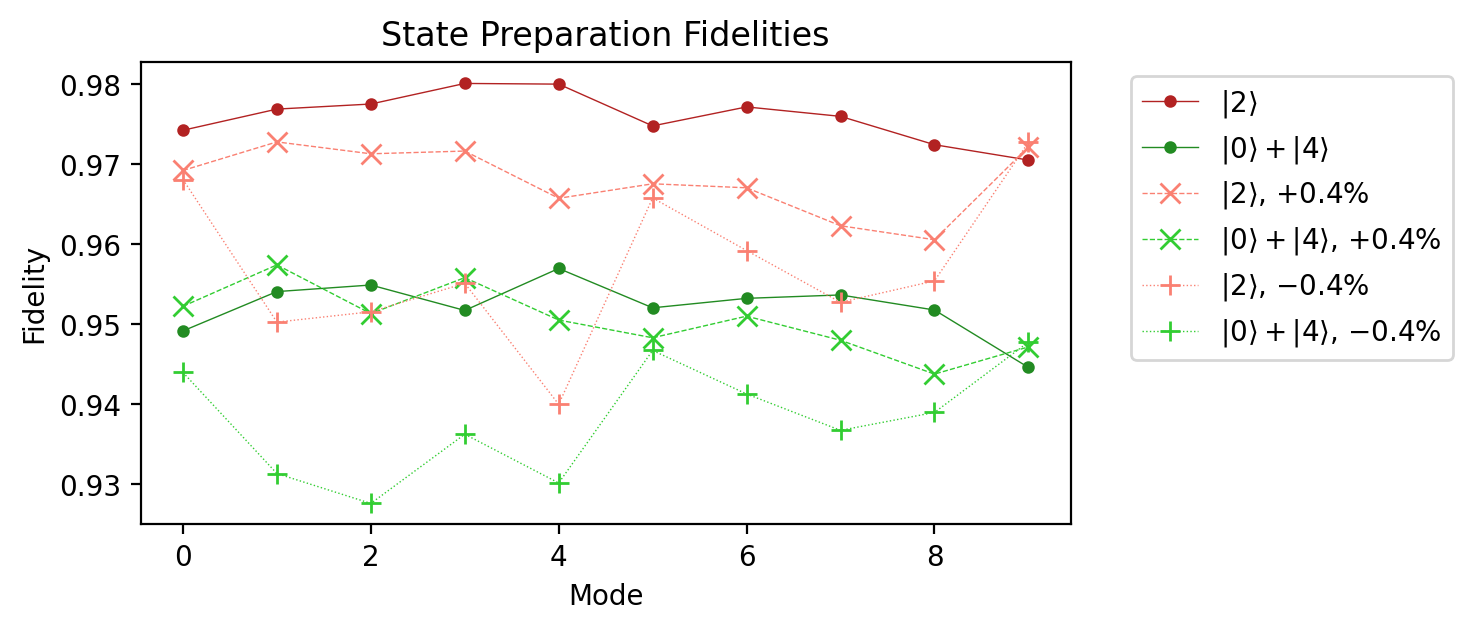

In [230]:
fig = plt.figure(figsize=(6, 3), dpi=200)

linewidth = 0.5
markersize = 7
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities"]["2"], markersize = markersize, marker = ".", label = r"$|2\rangle$", lw = linewidth, color = "firebrick")
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities"]["0_p_4"], markersize = markersize, marker = ".", label = r"$|0\rangle+|4\rangle$", lw = linewidth, color = "forestgreen")

plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities_upper"]["2"], markersize = markersize, marker = "x", label = r"$|2\rangle$, $+0.4\%$", lw = linewidth, color = "salmon", linestyle = "--")
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities_upper"]["0_p_4"], markersize = markersize, marker = "x", label = r"$|0\rangle+|4\rangle$, $+0.4\%$", lw = linewidth, color = "limegreen", linestyle = "--")


plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities_lower"]["2"], markersize = markersize, marker = "+", label = r"$|2\rangle$, $-0.4\%$", lw = linewidth, color = "salmon", linestyle = ":")
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities_lower"]["0_p_4"], markersize = markersize, marker = "+", label = r"$|0\rangle+|4\rangle$, $-0.4\%$", lw = linewidth, color = "limegreen", linestyle = ":")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Mode')
plt.ylabel('Fidelity')
plt.title('State Preparation Fidelities')

Text(0.5, 1.0, 'State Preparation Fidelities (Traced Out Transmon)')

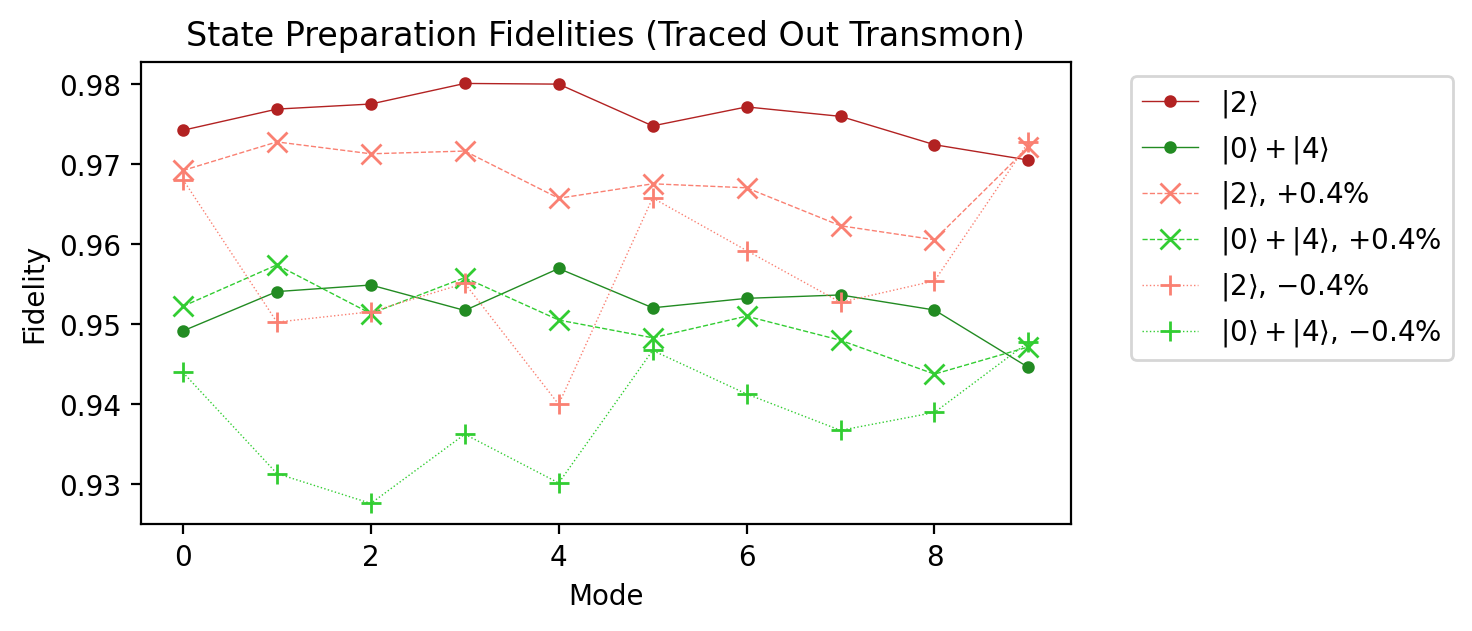

In [231]:
fig = plt.figure(figsize=(6, 3), dpi=200)

linewidth = 0.5
markersize = 7
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities"]["2"], markersize = markersize, marker = ".", label = r"$|2\rangle$", lw = linewidth, color = "firebrick")
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities"]["0_p_4"], markersize = markersize, marker = ".", label = r"$|0\rangle+|4\rangle$", lw = linewidth, color = "forestgreen")

plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities_upper"]["2"], markersize = markersize, marker = "x", label = r"$|2\rangle$, $+0.4\%$", lw = linewidth, color = "salmon", linestyle = "--")
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities_upper"]["0_p_4"], markersize = markersize, marker = "x", label = r"$|0\rangle+|4\rangle$, $+0.4\%$", lw = linewidth, color = "limegreen", linestyle = "--")


plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities_lower"]["2"], markersize = markersize, marker = "+", label = r"$|2\rangle$, $-0.4\%$", lw = linewidth, color = "salmon", linestyle = ":")
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities_lower"]["0_p_4"], markersize = markersize, marker = "+", label = r"$|0\rangle+|4\rangle$, $-0.4\%$", lw = linewidth, color = "limegreen", linestyle = ":")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Mode')
plt.ylabel('Fidelity')
plt.title('State Preparation Fidelities (Traced Out Transmon)')

Text(0.5, 1.0, 'State Preparation Fidelities')

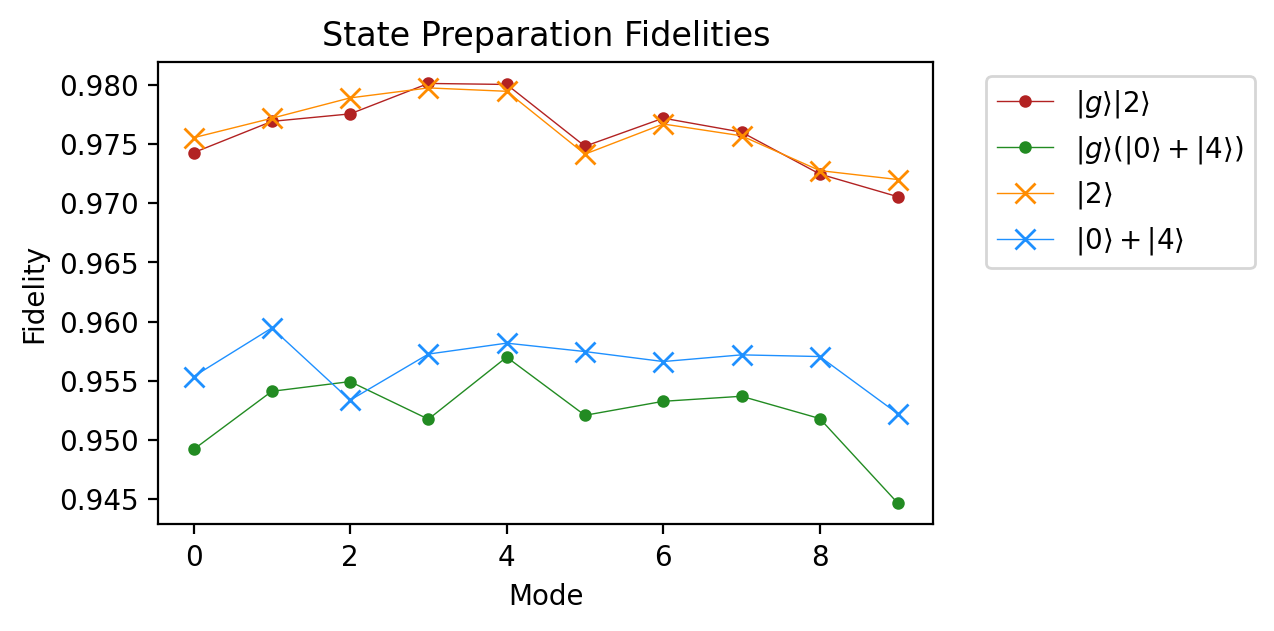

In [232]:
fig = plt.figure(figsize=(5, 3), dpi=200)

linewidth = 0.5
markersize = 7
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities"]["2"], markersize = markersize, marker = ".", label = r"$|g\rangle|2\rangle$", lw = linewidth, color = "firebrick")
plt.plot(fidelities_2_and_0p4["TargetState"]["fidelities"]["0_p_4"], markersize = markersize, marker = ".", label = r"$|g\rangle(|0\rangle+|4\rangle)$", lw = linewidth, color = "forestgreen")

plt.plot(fidelities_2_and_0p4["PT"]["fidelities"]["2"], markersize = markersize, marker = "x", label = r"$|2\rangle$", lw = linewidth, color = "darkorange")
plt.plot(fidelities_2_and_0p4["PT"]["fidelities"]["0_p_4"], markersize = markersize, marker = "x", label = r"$|0\rangle+|4\rangle$", lw = linewidth, color = "dodgerblue")


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Mode')
plt.ylabel('Fidelity')
plt.title('State Preparation Fidelities')

# Many Ramps

In [233]:
ramp_data = json.load(open('Data/Mode3_ManyRamps.json'))

In [234]:
keys_to_keep = {"B": [], "SS": [], "G": []}
for key in ramp_data["Stuff"]["op_drive_params"].keys():
    if ("_B_" in key) and ("chirped" not in key):
        keys_to_keep["B"].append(key)
    if ("_G_" in key) and ("chirped" not in key):
        keys_to_keep["G"].append(key)
    if ("_SS_" in key) and ("chirped" not in key):
        keys_to_keep["SS"].append(key)

In [235]:
ramp_data["Stuff"]["op_drive_params"]["f0g1_B_17.0_chirped"]

{'pulse_time': 199.30864197530866,
 'Envelope Args': {'pulse_time': 199.30864197530866, 'k': 2, 'ramp_time': 17},
 'epsilon': 0.78,
 'Envelope': 'Bump_Ramp',
 'shift': 0.042200385158,
 'chirp_params': [6.82544320162198e-05,
  0.07061262052408857,
  0.01293453714328528,
  -0.04122907603458877,
  0.0403616562416076,
  -0.0015013227320542135,
  -0.02740361158740162,
  0.013732784498265312],
 'accuracy': 0.9986782463146733,
 'freq_d': -2.869962347427361}

In [236]:
fig = plt.figure(figsize = (5, 3), dpi = 200)

for ramp in keys_to_keep.keys():
    x = []
    y = []
    for key in keys_to_keep[ramp]:
        x.append(ramp_data["Stuff"]["op_drive_params"][key]["Envelope Args"]["ramp_time"])
        y.append(ramp_data["Stuff"]["op_drive_params"][key]["fidelity"])


<Figure size 1000x600 with 0 Axes>

# Pulse Plot

## Setup

### Envelope Definitions

In [237]:
envelope_dict = {}

def gaussian(t, sigma=1, mu = 0):
    return np.exp(-(t-mu)**2/(2*sigma**2))

envelope_dict["Gaussian"] = gaussian

def bump(t, pulse_time = 10, k = 2, center = "None"):
    if center == "None":
        center = pulse_time/2

    x = (t-center)/(pulse_time/2)

    if x<= -1:
        return 0
    if x>= 1:
        return 0
    if x == 0:
        return 1
    else:
        return np.exp(k*x**2/(x**2-1))

envelope_dict["Bump"] = bump    

def bump_ramp(t, pulse_time=  10, ramp_time = 1, k = 2):
    if t <= ramp_time:
        return bump(t, pulse_time = 2*ramp_time, k = k)
    if (t<= (pulse_time - ramp_time)) and (t>ramp_time):
        return 1
    if t>(pulse_time - ramp_time):
        return bump(t, pulse_time = 2*ramp_time, k = k, center = pulse_time - ramp_time)

        
envelope_dict["Bump_Ramp"] = bump_ramp

### Plot options

In [295]:
color_dict = {}

color_dict["ge"] = "dodgerblue"
color_dict["ef"] = "firebrick"

color_dict["sb"] = "forestgreen"
color_dict["sb_mode3"] = color_dict["sb"]
color_dict["sb_mode5"] = "gold"


outline_width = 1
signal_width = 0.1
signal_alpha = 0.5

freq_factor = 1/20 # this scales the frequency of the carrier wave in the plot in order to make it easier to read
pulse_spacing = 1 # this is a spacing put between the pulses to make it easier to read!

### Plot function def

Both Mode3 and Mode3and5 are dictionaries.

The entry: Model["Stuff"]["op_drive_params"] is a dictionary of all the calibrated pulses for that model.

The entry: Model["Stuff]["Drive_Sequences"] contains some premade drive sequences. These are just lists of the keys for the "op_drive_params" dictionary. 

The function defined below takes in the Model dictionary and a drive sequence that is just a list of drive keys. 

In [328]:
def make_signal_plot(model, op_list):
    fig = plt.figure(figsize = (6,4), dpi = 200)
    # set height ratios for subplots
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 

    # the first subplot
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    yticks = ax1.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)


    ax0.spines[['bottom']].set_visible(False)
    ax1.spines[['top']].set_visible(False)

    # remove vertical gap between subplots
    plt.subplots_adjust(hspace=.0)

    ax0_max = 0
    ax1_max = 0


    total_t = 0
    spns = 15

    ax0.axhline(0, color = "grey", lw = 0.5)
    ax1.axhline(0, color = "grey", lw = 0.5)
    pulse_midpoints = []
    for op in op_list:
        op_params = model["Stuff"]["op_drive_params"][op]
        
        t0 = 0
        tf = op_params["pulse_time"]
        times = np.linspace(t0, tf, int((tf-t0)*spns))
        outline = np.fromiter((envelope_dict[op_params["Envelope"]](t, **op_params["Envelope Args"])*op_params["epsilon"] for t in times), times.dtype)
    
        sin_res = np.sin(2*np.pi*(op_params["freq_d"]+op_params["shift"])*times*freq_factor)

        pulse_midpoints.append(total_t + (tf-t0)/2)
        linestyle = "solid"
        if op.split("_")[0] == "q":
            if op.split("_")[1] == "ge":
                color = color_dict["ge"]
            if op.split("_")[1] == "ef":
                color = color_dict["ef"]
            if op.split("_")[1]=="half":
                if op.split("_")[2] == "ge":
                    color = color_dict["ge"]
                if op.split("_")[2] == "ef":
                    color = color_dict["ef"]
                linestyle = ":"

            ax0.plot(times+total_t, outline*1000, linewidth = outline_width, color = color, linestyle = linestyle) 
            ax0.plot(times + total_t, -outline*1000, linewidth = outline_width, color = color, linestyle = linestyle)
            ax0.plot(times+total_t, sin_res*outline*1000, linewidth = signal_width, alpha = signal_alpha, color = color)

            total_t += op_params["pulse_time"]+pulse_spacing

            if max(outline*1000) > ax0_max:
                ax0_max = max(outline)*1000
            

        if op.split("_")[0] == "sb":
            if "Mode" not in op:
                color = color_dict["sb"]
            if "Mode3" in op:
                color = color_dict["sb_mode3"]
            if "Mode5" in op:
                color = color_dict["sb_mode5"]
            
            ax1.plot(times+total_t, outline, linewidth = outline_width, color = color) 
            ax1.plot(times + total_t, -outline, linewidth = outline_width, color = color)
            ax1.plot(times+total_t, sin_res*outline, linewidth = signal_width, alpha = signal_alpha, color = color)

            total_t += op_params["pulse_time"]+pulse_spacing

            if max(outline) > ax1_max:
                ax1_max = max(outline)
            

    ax0.set_ylim(-ax0_max*1.5, ax0_max*1.5)
    ax1.set_ylim(-ax1_max*1.5, ax1_max*1.5)

    ax0.set_ylabel(r"$\varepsilon$ (MHz)") # y axis label for qubit pulses (top plot)
    ax1.set_ylabel(r"$\varepsilon$ (GHz)") # y axis label for sidebands
    ax1.set_xlabel("Time (ns)")

    # ax0p is the a twin axis
    ax0p = ax0.twiny()
    ax0p.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, direction = "in", pad = -15)
    
    pulse_ticks = pulse_midpoints[::2]
    pulse_tick_labels = (np.arange(len(pulse_midpoints))+1)[::2]
    ax0p.set_xticks(pulse_ticks, labels = pulse_tick_labels)
    ax0p.set_xlabel("Pulse #")


    xmin = -total_t/100
    xmax = total_t-xmin
    ax0p.set_xlim(xmin, xmax)
    ax0.set_xlim(xmin, xmax)
    ax1.set_xlim(xmin, xmax)

    plt.show()


### Loading Data

In [329]:
with open("ModelSaves/Mode3/Mode3.json", "r") as f:
    Mode3 = json.load(f)
with open("ModelSaves/Mode3and5/Mode3and5.json", "r") as f:
    Mode3and5 = json.load(f)

## Making Plots

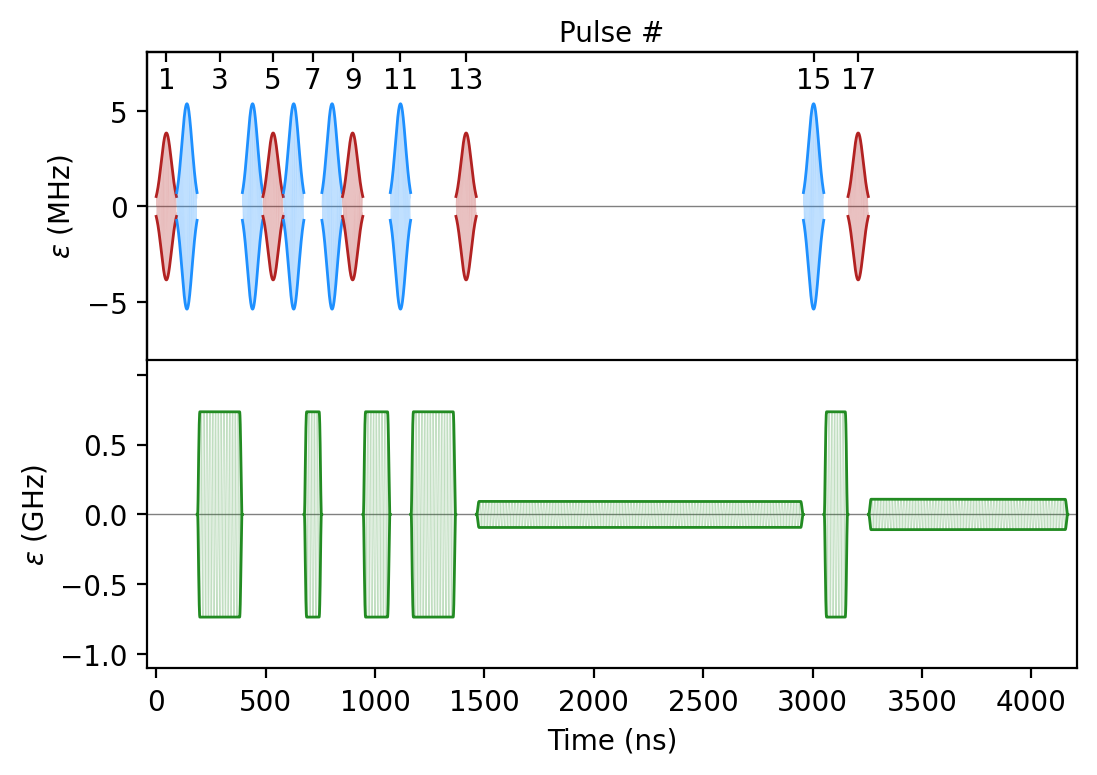

In [330]:
make_signal_plot(Mode3, Mode3["Stuff"]["Drive_Sequences"]["Binomial_Encoding"])

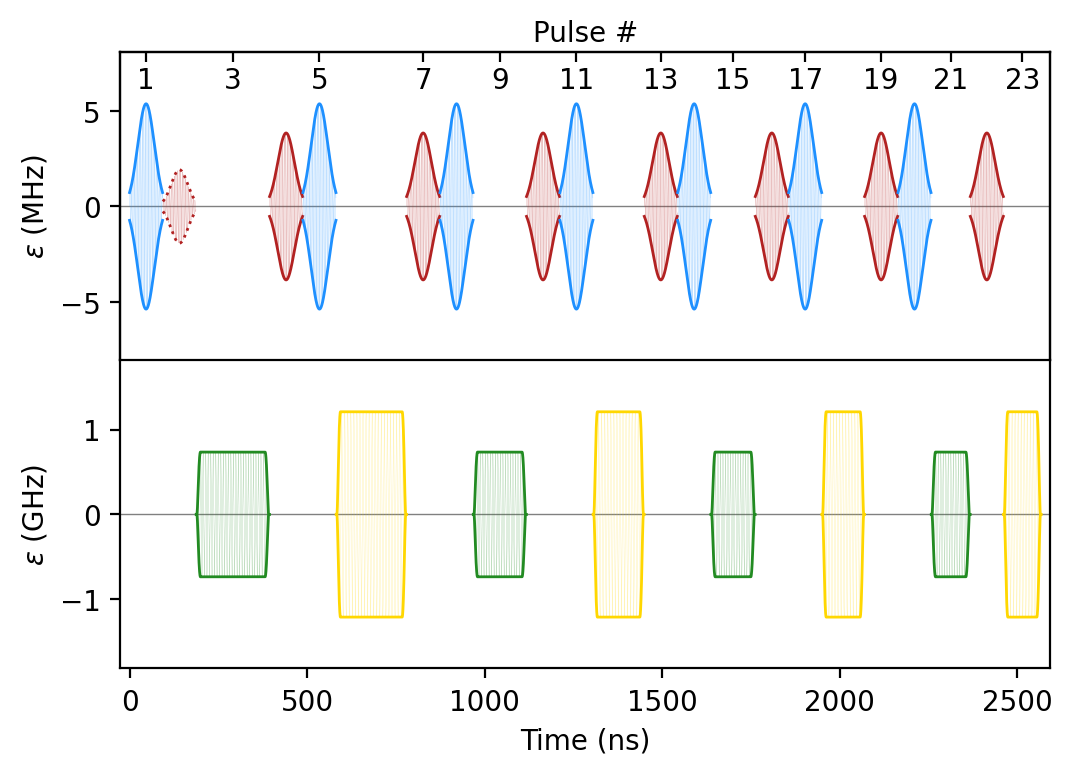

In [325]:
make_signal_plot(Mode3and5, Mode3and5["Stuff"]["Drive_Sequences"]["NooN_4"])

In [195]:
for key in (Mode3and5["Stuff"]["op_drive_params"].keys()):
    print(key)

q_ge_10
sb_f0g1_Mode3
sb_f0g1_Mode5
q_ge_12
sb_f1g2_Mode3
q_ef_00
q_ef_10
q_half_ef_00
q_ge_11
q_ge_01
q_ge_22
q_ef_11
q_ef_12
q_ge_00
q_ef_21
q_ef_22
q_ge_21
q_ef_01
sb_f1g2_Mode5


/var/folders/pz/792n3gf17_q7qbk9gpc9kzt00000gn/T/ipykernel_2757/570208807.py:82: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(-ax1_max*1.2, ax1_max*1.2)


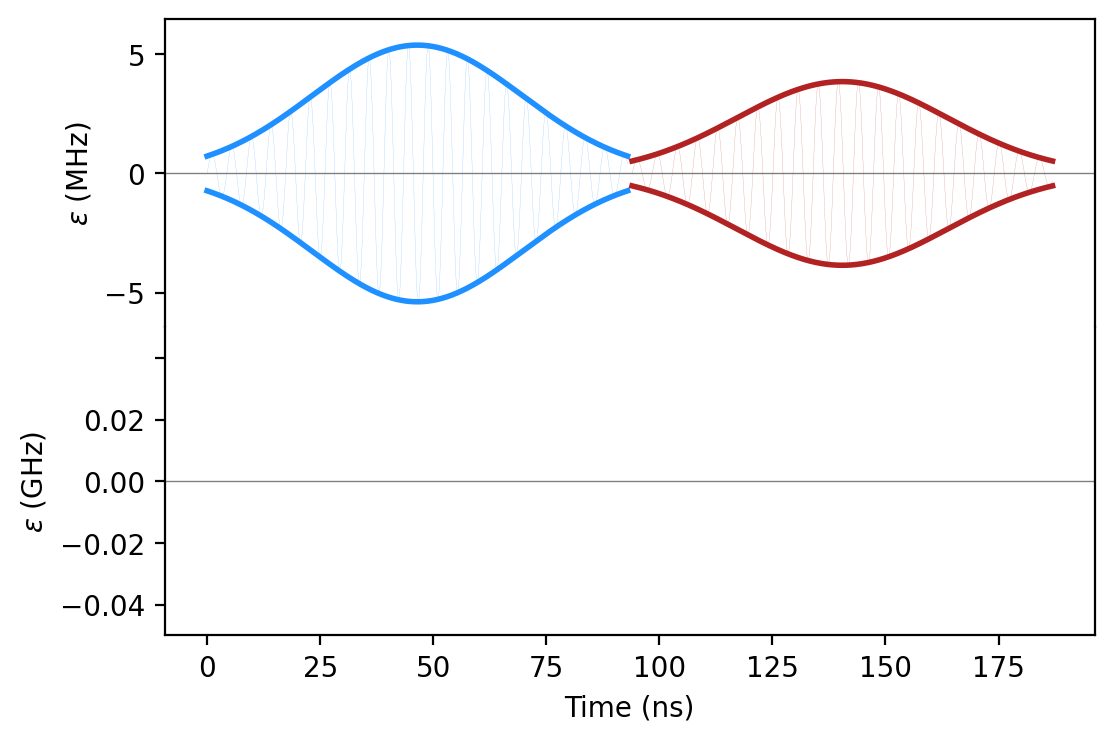

In [ ]:
make_signal_plot(Mode3, ["q_ge_0", "q_ef_0"])

# Starkshift Plots

In [2]:
with open("data/starkshifts.json", "r") as f:
    starkshift_data = json.load(f)

Text(0, 0.5, 'Stark Shift (MHz)')

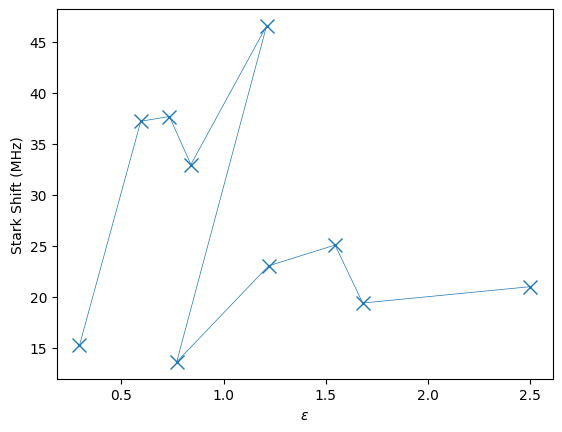

In [4]:
plt.figure()
plt.plot(starkshift_data["Model epsilon"], starkshift_data["Model SS"], lw = 0.5, marker = "x", ms = 10)
plt.xlabel(r'$\varepsilon$')
plt.ylabel("Stark Shift (MHz)")

Text(0, 0.5, 'Stark Shift (MHz)')

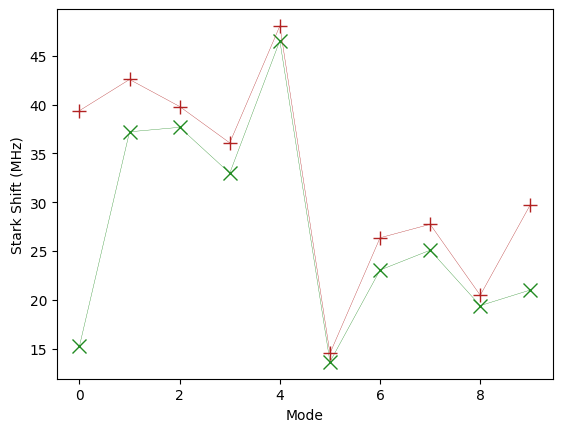

In [7]:
plt.figure()
plt.plot(starkshift_data["Model SS"], lw = 0.25, marker = "x", ms = 10, label = "Model", color = "forestgreen")
plt.plot(starkshift_data["Device SS"], lw = 0.25, marker = "+", ms = 10, label = "Device", color = "firebrick")
plt.xlabel("Mode")
plt.ylabel("Stark Shift (MHz)")